In [396]:
import pandas as pd

In [397]:
import quandl

In [398]:
df = quandl.get('WIKI/GOOGL')
# data from the stock market - share prices

In [399]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


(3424, 12)


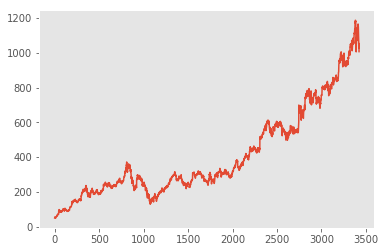

In [400]:
import matplotlib.pyplot as plt
import numpy as np
print(df.shape)
plt.plot(np.array(df['Adj. Close']))
plt.grid()

In [401]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [402]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [403]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100

In [404]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT
Date,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,8.072956
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,7.921706
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,4.049360
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,7.657099
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,3.886792


In [405]:
# we want to have the daily percent variation in value
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100

In [406]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,8.072956,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,7.921706,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,4.049360,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,7.657099,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,3.886792,1.183658


In [407]:
df.columns

Index(['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',
       'HL_PCT', 'PCT_change'],
      dtype='object')

In [408]:
df = df[['Adj. Close', 'Adj. Volume',
       'HL_PCT', 'PCT_change']]

In [409]:
df.head()
# so these are the columns that we actually care about

,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,
2004-08-19,50.322842,44659000.0,8.072956,0.324968
2004-08-20,54.322689,22834300.0,7.921706,7.227007
2004-08-23,54.869377,18256100.0,4.049360,-1.227880
2004-08-24,52.597363,15247300.0,7.657099,-5.726357
2004-08-25,53.164113,9188600.0,3.886792,1.183658


In [410]:
# we want to predict the price of the stocks
# we want to get Adj. close of the.. future. next day? next five days?
forecast_col = 'Adj. Close'

In [411]:
df.isna().sum()
# we can check there are no missing values

Adj. Close     0
Adj. Volume    0
HL_PCT         0
PCT_change     0
dtype: int64

In [412]:
#or.. we can do:
df.fillna(-9999, inplace=True)
# so that  Nan will be treated as an outlier

In [413]:
print(len(df))
df.shape

3424


(3424, 4)

In [414]:
import math
# math.ceil rounds things up
forecast_out = int(math.ceil(0.01*len(df)))
# we want to predict 10% of the dataframe
# we are going to use data from 10 days ago to predict today

In [415]:
forecast_out

35

In [416]:
df['label'] = df[forecast_col].shift(-forecast_out)
# we are just shifting the columns negatively (up), so that each row label column will be te adjusted close price 10 days (10 percent actually) into the feature

In [417]:
df.head()
# my data looks different from his... argh

,Adj. Close,Adj. Volume,HL_PCT,PCT_change,label
Date,,,,,
2004-08-19,50.322842,44659000.0,8.072956,0.324968,69.078238
2004-08-20,54.322689,22834300.0,7.921706,7.227007,67.839414
2004-08-23,54.869377,18256100.0,4.049360,-1.227880,68.912727
2004-08-24,52.597363,15247300.0,7.657099,-5.726357,70.668146
2004-08-25,53.164113,9188600.0,3.886792,1.183658,71.219849


In [418]:
df.tail()
# ok, makes sense that is Nan cause.. its been shifted upwards

,Adj. Close,Adj. Volume,HL_PCT,PCT_change,label
Date,,,,,
2018-03-21,1094.00,1990515.0,1.964351,0.130884,NaN
2018-03-22,1053.15,3418154.0,3.254997,-2.487014,NaN
2018-03-23,1026.55,2413517.0,4.082607,-2.360729,NaN
2018-03-26,1054.09,3272409.0,4.619150,0.332191,NaN
2018-03-27,1006.94,2940957.0,6.645878,-5.353887,NaN


In [419]:
print(df.isna().sum())
print(df.shape)


Adj. Close      0
Adj. Volume     0
HL_PCT          0
PCT_change      0
label          35
dtype: int64
(3424, 5)


In [420]:
# df.dropna(inplace=True)
df.tail()
print(df.shape)
# Dropping Rows with at least 1 null value.

(3424, 5)


In [421]:
df.shape
print(df.columns)
df.head()

Index(['Adj. Close', 'Adj. Volume', 'HL_PCT', 'PCT_change', 'label'], dtype='object')


,Adj. Close,Adj. Volume,HL_PCT,PCT_change,label
Date,,,,,
2004-08-19,50.322842,44659000.0,8.072956,0.324968,69.078238
2004-08-20,54.322689,22834300.0,7.921706,7.227007,67.839414
2004-08-23,54.869377,18256100.0,4.049360,-1.227880,68.912727
2004-08-24,52.597363,15247300.0,7.657099,-5.726357,70.668146
2004-08-25,53.164113,9188600.0,3.886792,1.183658,71.219849


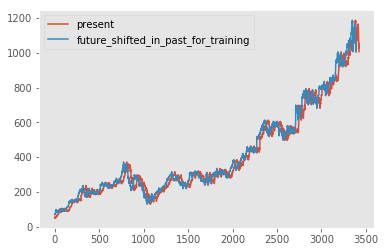

In [422]:
import matplotlib.pyplot as plt
plt.plot(np.array(df['Adj. Close']))
plt.plot(np.array(df['label']))
plt.legend(['present', 'future_shifted_in_past_for_training'])  
plt.grid()

In [423]:
import numpy as np

In [424]:
from sklearn import preprocessing, cross_validation, metrics, svm
from sklearn.linear_model import LinearRegression
# will help scaling the data

In [425]:
# support vector machine can be used for regression too

X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
print(X.shape)
print(X_lately.shape)
# df.drop returns a new dataframe!


(3389, 4)
(35, 4)


In [426]:
# scaling before fit
df.dropna(inplace=True)
y = np.array(df['label'])
print(y.shape)
df.label.isna().sum()
print(X.shape)

(3389,)
(3389, 4)


In [427]:
import pickle
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
clf = LinearRegression()
%time clf.fit(X_train, y_train)

with open('linearregression.pickle', 'wb') as f:
    pickle.dump(clf, f)
# we can comment the lines above, now that we have trained classifier saved!
pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

confidence = clf.score(X_test, y_test)
# .score Returns the coefficient of determination R^2 of the prediction.
confidence

Wall time: 2.99 ms


0.97774064767403

In [428]:
# it's really easy to switch between algorithm!!
clf = svm.SVR()
%time clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
confidence

Wall time: 553 ms


0.7909172324084178

In [429]:
forecast_set = clf.predict(X_lately)
forecast_set

array([358.88079297, 485.01913065, 359.99868012, 403.47435842,
       681.15512447, 688.29308647, 581.61211465, 625.27954763,
       670.66162956, 613.95504307, 614.97867735, 637.06500337,
       631.10496333, 618.13667241, 519.38857789, 580.23539744,
       409.86675786, 476.09595467, 572.83819038, 661.194704  ,
       546.91016438, 622.98696039, 542.02157091, 629.79586354,
       434.85023367, 639.88669853, 614.05535957, 553.29001538,
       556.40302114, 652.13643128, 662.07887664, 488.49117983,
       455.66078618, 459.58290064, 355.55944528])

In [430]:
import datetime
from matplotlib import style
style.use('ggplot')

In [431]:
df['Forecast'] = np.nan

In [432]:
df.head()

,Adj. Close,Adj. Volume,HL_PCT,PCT_change,label,Forecast
Date,,,,,,
2004-08-19,50.322842,44659000.0,8.072956,0.324968,69.078238,NaN
2004-08-20,54.322689,22834300.0,7.921706,7.227007,67.839414,NaN
2004-08-23,54.869377,18256100.0,4.049360,-1.227880,68.912727,NaN
2004-08-24,52.597363,15247300.0,7.657099,-5.726357,70.668146,NaN
2004-08-25,53.164113,9188600.0,3.886792,1.183658,71.219849,NaN


In [433]:
last_date = df.iloc[-1].name   # last day for which we have data... 
last_unix = last_date.timestamp()  # day in a weird numeric format (seconds)
one_day = 86400  # seconds in a day
next_unix = last_unix + one_day   # next day in weird second-like format

for i in forecast_set:  # we are going to populate the dataset now
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for a in range(len(df.columns)-1)] + [i]
    

In [434]:
print(last_date)
df.tail(40)

2018-02-05 00:00:00


,Adj. Close,Adj. Volume,HL_PCT,PCT_change,label,Forecast
Date,,,,,,
2018-01-30 00:00:00,1177.37,1792602.0,1.139829,-0.029718,1094.00,NaN
2018-01-31 00:00:00,1182.22,1643877.0,1.202822,-0.134312,1053.15,NaN
2018-02-01 00:00:00,1181.59,2774967.0,1.530988,0.476195,1026.55,NaN
2018-02-02 00:00:00,1119.20,5798880.0,1.798606,-0.729098,1054.09,NaN
2018-02-05 00:00:00,1068.76,3742469.0,5.450241,-2.893850,1006.94,NaN
2018-02-06 01:00:00,NaN,NaN,NaN,NaN,NaN,358.880793
2018-02-07 01:00:00,NaN,NaN,NaN,NaN,NaN,485.019131
2018-02-08 01:00:00,NaN,NaN,NaN,NaN,NaN,359.998680
2018-02-09 01:00:00,NaN,NaN,NaN,NaN,NaN,403.474358


In [ ]:
# lascio a te il compito di plottare, fratello ! 